<br>
<font color="#444499" size="7" style="line-height: 1.1"> Practicing Recurrent Neural Network in Appel Stock Market Dataset</font>

# Context

Le marché boursier est un marché qui permet l'échange transparent d'achats et de ventes d'actions d'entreprises. Chaque bourse a son propre indice boursier. L'indice est la valeur moyenne calculée en combinant plusieurs actions. Il permet de représenter l'ensemble du marché boursier et de prédire son évolution dans le temps. Le marché boursier peut avoir un impact considérable sur les personnes et sur l'économie du pays dans son ensemble. Par conséquent, prévoir les tendances boursières de manière efficace permet de minimiser le risque de perte et de maximiser le profit.


# Objective

L'objectif principal de l'utilisation d'un modèle de réseau de neurones récurrents (RNN) pour l'analyse de données temporelles est de capturer les relations complexes et les dépendances temporelles dans les données, afin de faire des prédictions précises sur les valeurs futures. Les RNN sont particulièrement utiles dans la modélisation de séries temporelles car ils peuvent prendre en compte les informations passées pour prédire les valeurs futures. En utilisant un modèle RNN, l'objectif est donc d'améliorer la précision des prévisions et de permettre une meilleure compréhension des tendances et des modèles dans les données temporelles.

# Variables

Le fichiers contient ces Attributs :

-   Unnamed: 0: un index numérique pour chaque entrée de données.
-   symbol: le symbole de l'entreprise cotée en bourse.
-   date: la date à laquelle les données ont été collectées.
-   close: le prix de clôture de l'action pour la journée.
-   high: le prix le plus élevé atteint par l'action au cours de la journée.
-   low: le prix le plus bas atteint par l'action au cours de la journée.
-   open: le prix d'ouverture de l'action pour la journée.
-   volume: le nombre total d'actions échangées pour la journée.
-   adjClose: le prix de clôture ajusté en fonction des actions telles que les dividendes et les splits.
-   adjHigh: le prix le plus élevé ajusté pour les actions telles que les dividendes et les splits.
-   adjLow: le prix le plus bas ajusté pour les actions telles que les dividendes et les splits.
-   adjOpen: le prix d'ouverture ajusté pour les actions telles que les dividendes et les splits.
-   adjVolume: le volume ajusté pour les actions telles que les dividendes et les splits.
-   divCash: le montant de la distribution de dividendes en espèces.
-   splitFactor: le facteur de division d'actions pour les actions ayant subi une division d'actions


# Data importation

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import Data
data=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Stock-MArket-Forecasting/master/AAPL.csv",index_col=1,parse_dates=['date'])

# Data Cleaning

In [3]:
# Check for missing values
print(data.isnull().sum())

# Drop missing values
data = data.dropna()

Unnamed: 0     0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64


# Summarize The Data

In [4]:
print(data.describe())

        Unnamed: 0        close         high          low         open  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    628.500000   167.723998   169.230475   166.039780   167.548266   
std     363.297628    56.850796    57.500128    56.006773    56.612707   
min       0.000000    90.340000    91.670000    89.470000    90.000000   
25%     314.250000   116.327500   117.405000   115.602500   116.482500   
50%     628.500000   160.485000   162.080000   158.974250   160.345000   
75%     942.750000   199.785000   201.277500   198.170000   199.520000   
max    1257.000000   327.200000   327.850000   323.350000   324.730000   

             volume     adjClose      adjHigh       adjLow      adjOpen  \
count  1.258000e+03  1258.000000  1258.000000  1258.000000  1258.000000   
mean   3.500397e+07   162.666715   164.131054   161.028013   162.493082   
std    1.729100e+07    58.733820    59.402842    57.869246    58.494560   
min    1.136204e+07    84.954351 

In [5]:
data.head() 

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
symbol,,,,,,,,,,,,,,
AAPL,0,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
AAPL,1,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
AAPL,2,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
AAPL,3,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
AAPL,4,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


# Visualise the data

C:\Users\Ibrahim-Lahlou\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

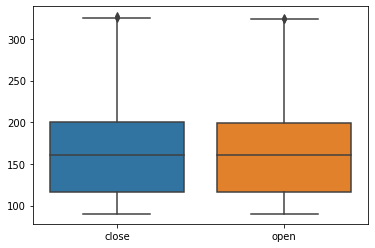

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verifying there's a correlation between close and open
cols = [ 'close','open']
sns.boxplot(data=data[cols])

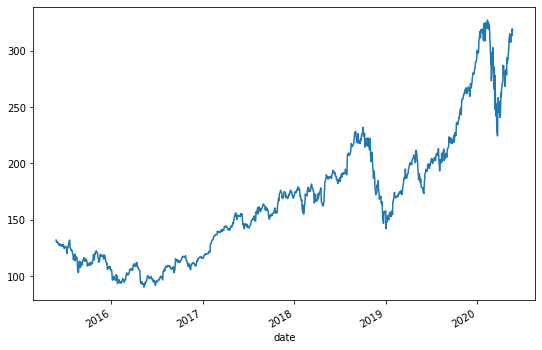

In [7]:
ts=pd.read_csv(
    'https://raw.githubusercontent.com/krishnaik06/Stock-MArket-Forecasting/master/AAPL.csv',
    header=0,
    index_col=2,
    parse_dates=True)
ts['close'].plot(figsize=(9,6))
plt.show()

>La série à une tendance croissante avec des fluctuations a cours du temps

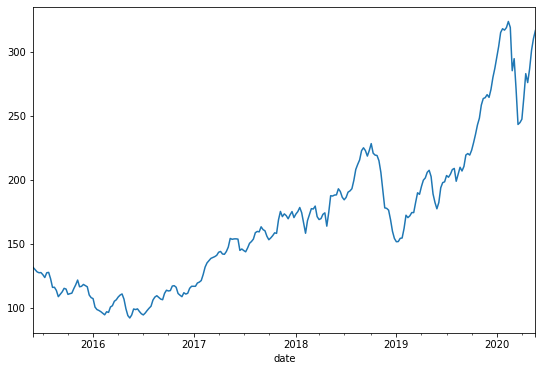

In [8]:
# Resample weekly the time series
rwts = ts.close.resample('W').mean()
rwts.plot(figsize=(9,6))
plt.show()

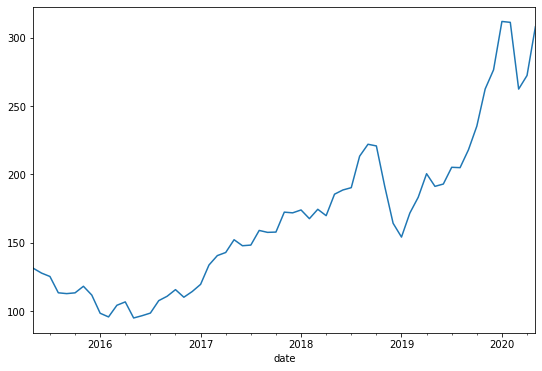

In [9]:
# Resample monthly the time series
rmts = ts.close.resample('M').mean()
rmts.plot(figsize=(9,6))
plt.show()

>La série ne doit pas étre compresser pour le traitement d'un Réseau de neurone réccurent

# Feature Learning

## Feature Extraction

In [10]:
ts = data[['date','close']]
ts

,date,close
symbol,,
AAPL,2015-05-27 00:00:00+00:00,132.045
AAPL,2015-05-28 00:00:00+00:00,131.780
AAPL,2015-05-29 00:00:00+00:00,130.280
AAPL,2015-06-01 00:00:00+00:00,130.535
AAPL,2015-06-02 00:00:00+00:00,129.960
...,...,...
AAPL,2020-05-18 00:00:00+00:00,314.960
AAPL,2020-05-19 00:00:00+00:00,313.140
AAPL,2020-05-20 00:00:00+00:00,319.230


In [11]:
type(ts['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Pour spécifier que les dates/heure ne sont pas en temps universel (UTC) et que l'année doit être spécifiée en premier dans la chaîne de date on peut faire comme suit

In [12]:
ts['date'] = pd.to_datetime(ts['date'],utc=False,yearfirst=True)
ts

C:\Users\IBRAHI~1\AppData\Local\Temp/ipykernel_23904/2626721089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['date'] = pd.to_datetime(ts['date'],utc=False,yearfirst=True)


,date,close
symbol,,
AAPL,2015-05-27 00:00:00+00:00,132.045
AAPL,2015-05-28 00:00:00+00:00,131.780
AAPL,2015-05-29 00:00:00+00:00,130.280
AAPL,2015-06-01 00:00:00+00:00,130.535
AAPL,2015-06-02 00:00:00+00:00,129.960
...,...,...
AAPL,2020-05-18 00:00:00+00:00,314.960
AAPL,2020-05-19 00:00:00+00:00,313.140
AAPL,2020-05-20 00:00:00+00:00,319.230


In [13]:
ts['date'][0]

Timestamp('2015-05-27 00:00:00+0000', tz='UTC')

In [14]:
# convert time to learnable feature 
from tqdm.notebook import tqdm
from Script import feature_extraction

fts = feature_extraction(ts)

  0%|          | 0/1258 [00:00<?, ?it/s]

In [15]:
fts

,year,month,day,close
0,2015,5,27,132.045
1,2015,5,28,131.780
2,2015,5,29,130.280
3,2015,6,1,130.535
4,2015,6,2,129.960
...,...,...,...,...
1253,2020,5,18,314.960
1254,2020,5,19,313.140
1255,2020,5,20,319.230
1256,2020,5,21,316.850


## Split Data and Normalisation

In [16]:

from Script import split_transform

train,test,valid,Scaler = split_transform(fts)
train

train shape : (943, 4)
test shape : (188, 4)
validation data  (127, 4)


,year,month,day,close
0,-1.0,-0.272727,0.733333,-0.411487
1,-1.0,-0.272727,0.800000,-0.415226
2,-1.0,-0.272727,0.866667,-0.436393
3,-1.0,-0.090909,-1.000000,-0.432795
4,-1.0,-0.090909,-0.933333,-0.440909
...,...,...,...,...
938,1.0,-0.818182,-0.066667,0.130036
939,1.0,-0.818182,0.200000,0.137233
940,1.0,-0.818182,0.266667,0.152755
941,1.0,-0.818182,0.333333,0.139067


In [17]:
test

,year,month,day,close
943,-1.0,-1.000000,0.600000,-0.963425
944,-1.0,-1.000000,0.666667,-0.961311
945,-1.0,-1.000000,0.733333,-0.949894
946,-1.0,-1.000000,0.800000,-0.986258
947,-1.0,-0.777778,-1.000000,-0.947780
...,...,...,...,...
1126,-1.0,1.000000,-0.200000,0.944397
1127,-1.0,1.000000,-0.133333,0.905708
1128,-1.0,1.000000,-0.066667,0.971670
1129,-1.0,1.000000,0.133333,1.000000


## Creating Sequence

In [18]:
from Script import create_sequences

train_seq = create_sequences(train,10)
test_seq = create_sequences(test,10)
valid_seq = create_sequences(valid,10)

  0%|          | 0/933 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

In [19]:
train_seq[len(train_seq)-2:]

[(     year     month       day     close
  931   1.0 -0.818182 -0.666667  0.183941
  932   1.0 -0.818182 -0.600000  0.137374
  933   1.0 -0.818182 -0.533333  0.129895
  934   1.0 -0.818182 -0.333333  0.116066
  935   1.0 -0.818182 -0.266667  0.136668
  936   1.0 -0.818182 -0.200000  0.126649
  937   1.0 -0.818182 -0.133333  0.135398
  938   1.0 -0.818182 -0.066667  0.130036
  939   1.0 -0.818182  0.200000  0.137233
  940   1.0 -0.818182  0.266667  0.152755,
  0.1390672405277642),
 (     year     month       day     close
  932   1.0 -0.818182 -0.600000  0.137374
  933   1.0 -0.818182 -0.533333  0.129895
  934   1.0 -0.818182 -0.333333  0.116066
  935   1.0 -0.818182 -0.266667  0.136668
  936   1.0 -0.818182 -0.200000  0.126649
  937   1.0 -0.818182 -0.133333  0.135398
  938   1.0 -0.818182 -0.066667  0.130036
  939   1.0 -0.818182  0.200000  0.137233
  940   1.0 -0.818182  0.266667  0.152755
  941   1.0 -0.818182  0.333333  0.139067,
  0.1660198969872293)]

In [20]:
len(train_seq),len(test_seq)

(933, 178)

## Creating Sequence Classes

In [21]:
from PytorchScript import SequenceDataset,SalesDataset

In [22]:
Data_module = SalesDataset(train_seq,test_seq)
Data_module.setup()
train_data = Data_module.train_dataloader()
test_data = Data_module.test_dataloader()

In [23]:
train_seq_ds = SequenceDataset(train_seq)
train_seq_ds[0]

{'sequence': tensor([[-1.0000, -0.2727,  0.7333, -0.4115],
         [-1.0000, -0.2727,  0.8000, -0.4152],
         [-1.0000, -0.2727,  0.8667, -0.4364],
         [-1.0000, -0.0909, -1.0000, -0.4328],
         [-1.0000, -0.0909, -0.9333, -0.4409],
         [-1.0000, -0.0909, -0.8667, -0.4387],
         [-1.0000, -0.0909, -0.8000, -0.4494],
         [-1.0000, -0.0909, -0.7333, -0.4594],
         [-1.0000, -0.0909, -0.5333, -0.4714],
         [-1.0000, -0.0909, -0.4667, -0.4768]]),
 'label': tensor(-0.4561)}

In [24]:
# explore input dimensions 
input_dim,n_features = train_seq_ds[0]["sequence"].shape 
input_dim,n_features

(10, 4)

# RNN's Architecture

In [25]:
from torch import nn

class RNNModel(nn.Module):
  def __init__(self, input_dim=n_features, hidden_dim=4, layer_dim=2, output_dim=1):
    super(RNNModel, self).__init__()
    # Defining the number of layers and the nodes in each layer
    self.hidden_dim = hidden_dim
    self.layer_dim = layer_dim
    # RNN layers
    self.rnn = nn.RNN(
        input_size = input_dim, hidden_size=hidden_dim, num_layers = layer_dim, batch_first=True
    )
    # Fully connected layer
    self.fc = nn.Linear(hidden_dim, output_dim)
  
  def forward(self, x):
      # Initializing hidden state for first input with zeros
      h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
      # Forward propagation by passing in the input and hidden state into the model
      out, h0 = self.rnn(x, h0.detach())
      # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
      # so that it can fit into the fully connected layer
      out = out[:, -1, :]
      # return the final state to our desired output shape (batch_size, output_dim)
      return self.fc(out)

In [26]:
for batch in train_data : 
  print(batch["sequence"].shape)
  print(batch["label"].shape)
  break

torch.Size([1, 10, 4])
torch.Size([1])


In [27]:
len(train_data)

933

# Model Training

In [28]:
import torch.optim as optim
from PytorchScript import RMSELoss,SalesPredictions
import torch

Model = RNNModel()
#1 tuning hyperparamaters
lr = 0.001
epochs = 40
optimizer = optim.SGD(Model.parameters(), lr=lr)
criterion = RMSELoss()

***training for RMSE loss function and SGD optimisation***


  0%|          | 0/40 [00:00<?, ?it/s]

C:\Users\Ibrahim-Lahlou\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/40, Train Loss: 0.3985, Test Loss: 0.6672
Epoch 2/40, Train Loss: 0.3276, Test Loss: 0.6558
Epoch 3/40, Train Loss: 0.3215, Test Loss: 0.6502
Epoch 4/40, Train Loss: 0.3187, Test Loss: 0.6446
Epoch 5/40, Train Loss: 0.3146, Test Loss: 0.6421
Epoch 6/40, Train Loss: 0.3119, Test Loss: 0.6426
Epoch 7/40, Train Loss: 0.3113, Test Loss: 0.6423
Epoch 8/40, Train Loss: 0.3096, Test Loss: 0.6410
Epoch 9/40, Train Loss: 0.3064, Test Loss: 0.6429
Epoch 10/40, Train Loss: 0.3060, Test Loss: 0.6436
Epoch 11/40, Train Loss: 0.3042, Test Loss: 0.6393
Epoch 12/40, Train Loss: 0.3002, Test Loss: 0.6383
Epoch 13/40, Train Loss: 0.2970, Test Loss: 0.6404
Epoch 14/40, Train Loss: 0.2959, Test Loss: 0.6361
Epoch 15/40, Train Loss: 0.2913, Test Loss: 0.6345
Epoch 16/40, Train Loss: 0.2869, Test Loss: 0.6351
Epoch 17/40, Train Loss: 0.2845, Test Loss: 0.6286
Epoch 18/40, Train Loss: 0.2770, Test Loss: 0.6230
Epoch 19/40, Train Loss: 0.2701, Test Loss: 0.5994
Epoch 20/40, Train Loss: 0.2534, Test Lo

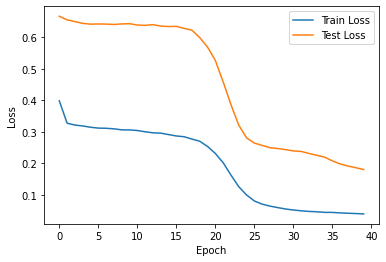

In [29]:
print("***training for RMSE loss function and SGD optimisation***")
Trainer = SalesPredictions(Model,criterion,optimizer)
Trainer.train_test_rnn(epochs,train_data,test_data)

In [30]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in Model.state_dict():
    print(param_tensor, "   \t\t\t", Model.state_dict()[param_tensor].size())

Model's state_dict:
rnn.weight_ih_l0    			 torch.Size([4, 4])
rnn.weight_hh_l0    			 torch.Size([4, 4])
rnn.bias_ih_l0    			 torch.Size([4])
rnn.bias_hh_l0    			 torch.Size([4])
rnn.weight_ih_l1    			 torch.Size([4, 4])
rnn.weight_hh_l1    			 torch.Size([4, 4])
rnn.bias_ih_l1    			 torch.Size([4])
rnn.bias_hh_l1    			 torch.Size([4])
fc.weight    			 torch.Size([1, 4])
fc.bias    			 torch.Size([1])


In [31]:
# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t\n", optimizer.state_dict()[var_name])

Optimizer's state_dict:
state 	
 {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}, 2: {'momentum_buffer': None}, 3: {'momentum_buffer': None}, 4: {'momentum_buffer': None}, 5: {'momentum_buffer': None}, 6: {'momentum_buffer': None}, 7: {'momentum_buffer': None}, 8: {'momentum_buffer': None}, 9: {'momentum_buffer': None}}
param_groups 	
 [{'lr': 0.001, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


In [32]:
from torch.utils.data import Dataset, DataLoader

valid_dataset = SequenceDataset(valid_seq)
valid_data = DataLoader(valid_dataset,batch_size=4)

In [33]:
test_dataset = SequenceDataset(test_seq)
test_data = DataLoader(test_dataset,batch_size=4)

In [34]:
actual = valid_seq[0][0]
print(len(actual))
actual.info() # one sequence

10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 1131 to 1140
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    10 non-null     float64
 1   month   10 non-null     float64
 2   day     10 non-null     float64
 3   close   10 non-null     float64
dtypes: float64(4)
memory usage: 452.0 bytes


# Loading Models

In [35]:
#storing the state of the model in pytorch file
state_dict = torch.load("rnn-model.pt")

In [36]:
loaded_model = RNNModel()
loaded_model.load_state_dict(state_dict)
loaded_model.eval()

RNNModel(
  (rnn): RNN(4, 4, num_layers=2, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

# Model Evaluation

In [37]:
from Script import split_data,explore_predictions

training_data, testing_data, validation_data = split_data(data)

In [38]:
from PytorchScript import model_evaluation,predictions_preprocess,reformat_data
from sklearn.preprocessing import MinMaxScaler

predictions_on_train = model_evaluation(loaded_model,train_data)
predictions_train,train_target = predictions_preprocess(predictions_on_train,train)
predictions_train,train_target = reformat_data(predictions_train,train_target,training_data)
explore_predictions(predictions_train,train_target)

NameError: name 'Scaler' is not defined

In [ ]:
testing_data.tail()